In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, completeness_score, homogeneity_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [3]:
train = np.loadtxt("Physical Activity Data/train.txt")
test = np.loadtxt("Physical Activity Data/test.txt")
train_label = np.loadtxt("Physical Activity Data/train_labels.txt")
test_label = np.loadtxt("Physical Activity Data/test_labels.txt")

In [4]:
df_train = df = pd.DataFrame(data=train)
df_test = df = pd.DataFrame(data=test)
df_train_label = df = pd.DataFrame(data=train_label)
df_test_label = df = pd.DataFrame(data=test_label)


In [5]:
df = pd.concat([df_train, df_test], sort=False, axis=0)
label = pd.concat([df_train_label, df_test_label], sort=False, axis=0)
y = np.concatenate((train_label, test_label))

In [6]:
label.value_counts()

6.0    1944
5.0    1906
4.0    1777
1.0    1722
2.0    1544
3.0    1406
Name: count, dtype: int64

In [7]:
scaler = StandardScaler()
scaler.fit(df)
X_norm = scaler.transform(df)
X_norm[0][0]

0.2105338541767611

In [8]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 9):
    silhouette.append(get_silhouette(clust_num, X_norm))

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

In [9]:
silhouette[0]

0.3937324764077081

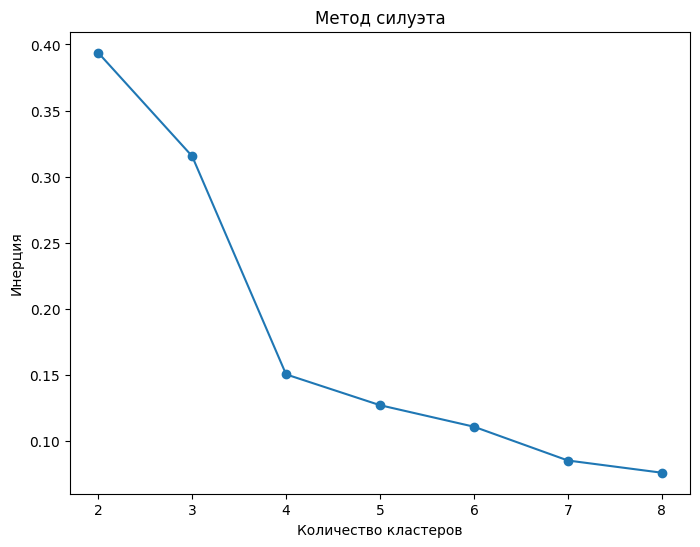

In [10]:
# визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette, marker='o', linestyle='-')
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

In [11]:
def get_calinski(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    calinski = calinski_harabasz_score(X, k_means.labels_)
    return calinski

calinski = []
for clust_num in range(2, 9):
    calinski.append(get_calinski(clust_num, X_norm))

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

In [12]:
calinski[0]

7880.813903657111

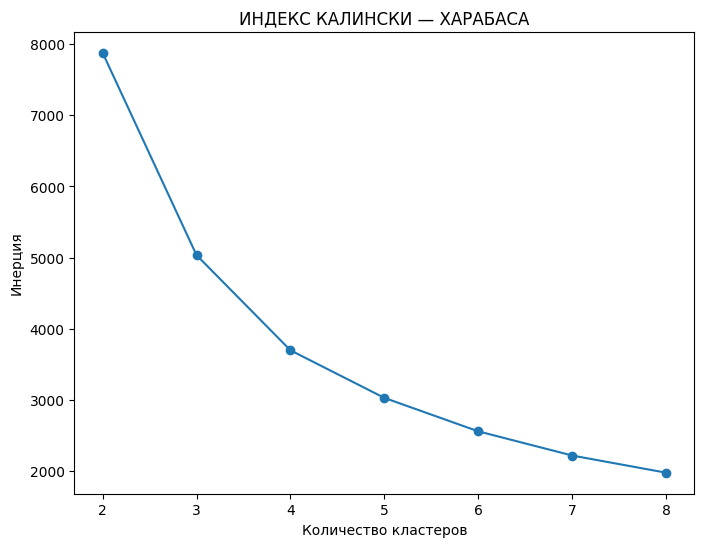

In [13]:
# визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), calinski, marker='o', linestyle='-')
plt.title('ИНДЕКС КАЛИНСКИ — ХАРАБАСА')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

In [14]:
def get_davies_bouldin(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    davies_bouldin = davies_bouldin_score(X, k_means.labels_)
    return davies_bouldin

davies_bouldin = []
for clust_num in range(2, 9):
    davies_bouldin.append(get_davies_bouldin(clust_num, X_norm))

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

In [15]:
davies_bouldin[0]

1.070744182238566

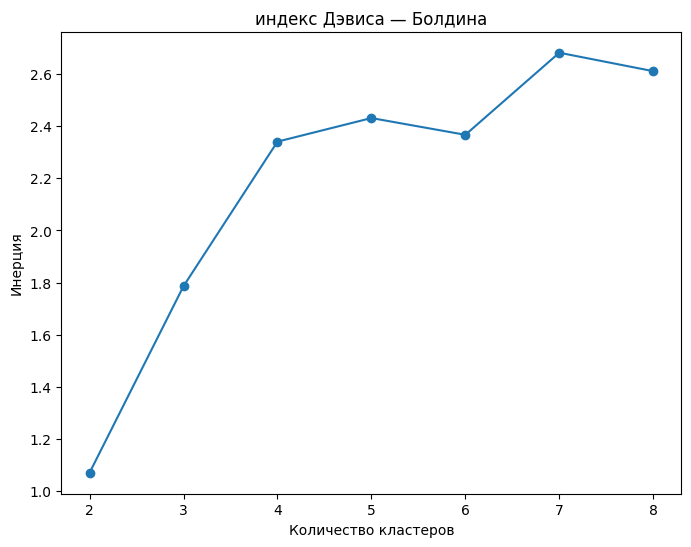

In [16]:
# визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), davies_bouldin, marker='o', linestyle='-')
plt.title('индекс Дэвиса — Болдина')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

In [17]:
km = KMeans(n_clusters=6, init='random', random_state=42)
km.fit(X_norm)


c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=6, random_state=42)

In [18]:
#вычисляем значение однородности
print(homogeneity_score(y, km.labels_))
#вычисляем значение полноты
print(completeness_score(y, km.labels_))
#вычисляем значение скорректированного индекса Рэнда
print(adjusted_rand_score(y, km.labels_))

0.5404114294595578
0.5809491951515007
0.4196031125923396


In [19]:
k =  pd.DataFrame(data=km.labels_)
k.value_counts()

1    2638
2    2472
4    1925
0    1647
5    1338
3     279
Name: count, dtype: int64

In [20]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, km.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,0,0,903,78,741,0
подъём,0,0,1242,5,295,2
спуск,0,0,321,196,889,0
сидение,91,1238,1,0,0,447
стояние,0,1346,0,0,0,560
лежание,1556,54,5,0,0,329


In [21]:
k_means =  KMeans(n_clusters=2, random_state=42)
k_means.fit(X_norm)
ctable = pd.crosstab(y, k_means.labels_)
ctable.index = ['ходьба', 'подъём', 
                'спуск', 'сидение', 'стояние', 'лежание']
ctable.columns = list(range(1,3))

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
ctable

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


In [24]:
completeness_score(y, k_means.labels_)

0.979530559699631

In [26]:
ag = AgglomerativeClustering(n_clusters=2).fit(X_norm)
print("Completeness: %0.3f" % completeness_score(y, ag.labels_))

Completeness: 1.000
